In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Ujjwal\Desktop\Admission_Predict (1).csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df['Admit Chance (0/1)'] = [0 if each<0.8
                            else 1
                            for each in df['Chance of Admit ']
                           ]

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit Chance (0/1)
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,1
396,397,325,107,3,3.0,3.5,9.11,1,0.84,1
397,398,330,116,4,5.0,4.5,9.45,1,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit Chance (0/1)'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA']]
y = df[['Admit Chance (0/1)']]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
model = clf.fit(xtrain,ytrain)

In [10]:
ypred = model.predict(xtest)

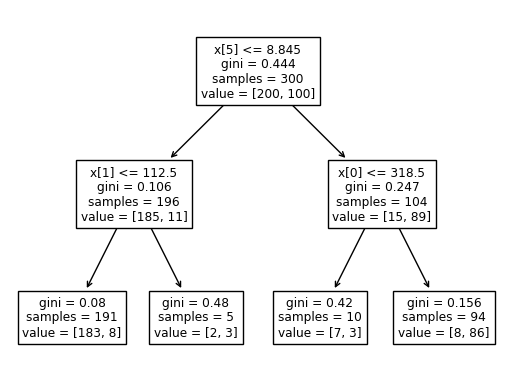

In [11]:
from sklearn.tree import plot_tree
a = plot_tree(model)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(ytest,ypred)
acs = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(cm)
print(acs)
print(cr)

[[65  7]
 [ 1 27]]
0.92
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        72
           1       0.79      0.96      0.87        28

    accuracy                           0.92       100
   macro avg       0.89      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100

